In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
result = pd.read_csv("result.csv")

In [3]:
result.head()

,Unnamed: 0,country_id,country_name,locality_id,locality_name,market_id,market_name,commodityID,commodity,currency_id,currency_name,market_typeID,market_type,measurement_id,unit_goods_measurement,month,year,price,Source
0,434592,182,Nigeria,65698,Abia,1967,Aba,71,Rice (local),95,NGN,14,Wholesale,9,100 KG,3,2017,16936.0,FEWSNET
1,434593,182,Nigeria,65698,Abia,1967,Aba,71,Rice (local),95,NGN,14,Wholesale,9,100 KG,4,2017,13615.0,FEWS NET
2,434594,182,Nigeria,65698,Abia,1967,Aba,71,Rice (local),95,NGN,14,Wholesale,9,100 KG,5,2017,13500.0,FEWS NET
3,434792,182,Nigeria,2216,Borno,1968,Biu,71,Rice (local),95,NGN,14,Wholesale,9,100 KG,1,2015,14000.0,"FEWS NET, Nigeria"
4,434793,182,Nigeria,2216,Borno,1968,Biu,71,Rice (local),95,NGN,14,Wholesale,9,100 KG,2,2015,13640.0,"FEWS NET, Nigeria"


In [4]:
rice_maize_df= result.copy()

In [5]:
result1 = result[["commodity","year","month","price"]]
result1

,commodity,year,month,price
0,Rice (local),2017,3,16936.0
1,Rice (local),2017,4,13615.0
2,Rice (local),2017,5,13500.0
3,Rice (local),2015,1,14000.0
4,Rice (local),2015,2,13640.0
...,...,...,...,...
1031,Maize,2016,8,130.0
1032,Maize,2016,9,159.0
1033,Maize,2016,10,159.0
1034,Maize,2016,11,164.0


In [6]:
result1['year']= result1['year'].astype(str)
result1['month']= result1['month'].astype(str)

C:\Users\USER\AppData\Local\Temp\ipykernel_15212\2266927086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1['year']= result1['year'].astype(str)
C:\Users\USER\AppData\Local\Temp\ipykernel_15212\2266927086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1['month']= result1['month'].astype(str)


In [7]:
result1['period']= pd.to_datetime(result1['year'].astype(str) + '-' + result['month'].astype(str),yearfirst=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15212\435510288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1['period']= pd.to_datetime(result1['year'].astype(str) + '-' + result['month'].astype(str),yearfirst=True)


In [8]:
result1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   commodity  1036 non-null   object        
 1   year       1036 non-null   object        
 2   month      1036 non-null   object        
 3   price      1036 non-null   float64       
 4   period     1036 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 40.6+ KB


In [9]:
df_rice= result1[result1['commodity'] == 'Rice (local)']
df_rice.head()

,commodity,year,month,price,period
0,Rice (local),2017,3,16936.0,2017-03-01
1,Rice (local),2017,4,13615.0,2017-04-01
2,Rice (local),2017,5,13500.0,2017-05-01
3,Rice (local),2015,1,14000.0,2015-01-01
4,Rice (local),2015,2,13640.0,2015-02-01


In [10]:
df_rice= df_rice.drop(['commodity','year', 'month'], axis=1)
df_rice.head()

,price,period
0,16936.0,2017-03-01
1,13615.0,2017-04-01
2,13500.0,2017-05-01
3,14000.0,2015-01-01
4,13640.0,2015-02-01


In [11]:
df_rice = df_rice.sort_values(['period', 'price'])
df_rice.head()

,price,period
89,13000.0,2014-07-01
124,13000.0,2014-07-01
194,14000.0,2014-07-01
264,14000.0,2014-07-01
430,14000.0,2014-07-01


In [12]:
df_rice.set_index('period',inplace=True)

In [13]:
df_rice = df_rice.loc[~df_rice.index.duplicated(keep='first')]

In [14]:
df_rice.head()

,price
period,
2014-07-01,13000.0
2014-08-01,12750.0
2014-09-01,13200.0
2014-10-01,10375.0
2014-11-01,10604.0


<AxesSubplot:xlabel='period'>

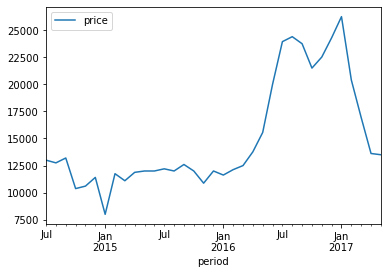

In [15]:
df_rice.plot()

In [16]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df_rice['price'])

In [18]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [19]:
adfuller_test(df_rice['price'])

ADF Test Statistic : -2.0331040790569417
p-value : 0.2722493349483925
#Lags Used : 5
Number of Observations Used : 29
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
df_rice['Price First Difference'] = df_rice['price'] - df_rice['price'].shift(1)

In [21]:
df_rice['price'].shift(1)

period
2014-07-01        NaN
2014-08-01    13000.0
2014-09-01    12750.0
2014-10-01    13200.0
2014-11-01    10375.0
2014-12-01    10604.0
2015-01-01    11408.0
2015-02-01     8000.0
2015-03-01    11750.0
2015-04-01    11100.0
2015-05-01    11875.0
2015-06-01    12000.0
2015-07-01    12000.0
2015-08-01    12200.0
2015-09-01    12000.0
2015-10-01    12600.0
2015-11-01    12000.0
2015-12-01    10875.0
2016-01-01    12000.0
2016-02-01    11625.0
2016-03-01    12125.0
2016-04-01    12500.0
2016-05-01    13770.0
2016-06-01    15560.0
2016-07-01    20000.0
2016-08-01    23941.5
2016-09-01    24400.0
2016-10-01    23750.0
2016-11-01    21500.0
2016-12-01    22520.0
2017-01-01    24300.0
2017-02-01    26250.0
2017-03-01    20400.0
2017-04-01    16936.0
2017-05-01    13615.0
Name: price, dtype: float64

In [22]:
df_rice['Seasonal First Difference']=df_rice['price']-df_rice['price'].shift(12)

In [23]:
df_rice.head(14)

,price,Price First Difference,Seasonal First Difference
period,,,
2014-07-01,13000.0,NaN,NaN
2014-08-01,12750.0,-250.0,NaN
2014-09-01,13200.0,450.0,NaN
2014-10-01,10375.0,-2825.0,NaN
2014-11-01,10604.0,229.0,NaN
2014-12-01,11408.0,804.0,NaN
2015-01-01,8000.0,-3408.0,NaN
2015-02-01,11750.0,3750.0,NaN
2015-03-01,11100.0,-650.0,NaN


In [24]:
## Again test dickey fuller test
adfuller_test(df_rice['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.4087440263866835
p-value : 0.13928366583176482
#Lags Used : 7
Number of Observations Used : 15
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='period'>

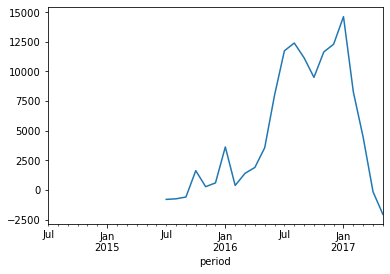

In [25]:
df_rice['Seasonal First Difference'].plot()

Auto Regressive Model

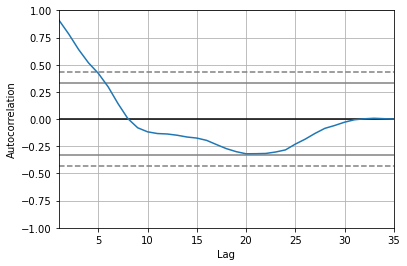

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_rice['price'])
plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
model = ARIMA(df_rice['price'], order=(1,1,1))

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
model_fit = model.fit()
model_fit

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -307.979
Date:                Thu, 30 Mar 2023   AIC                            621.958
Time:                        11:46:04   BIC                            626.537
Sample:                    07-01-2014   HQIC                           623.519
                         - 05-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2453      1.624      0.151      0.880      -2.938       3.429
ma.L1         -0.1303      1.670     -0.078      0.938      -3.403       3.143
sigma2      4.454e+06   9.26e+05      4.809      0.000    2.64e+06    6.27e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 2.50
Prob(Q):                              0.55   Prob(JB):                         0.29
Heteroskedasticity (H):               1.83   Skew:                            -0.45
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='period'>

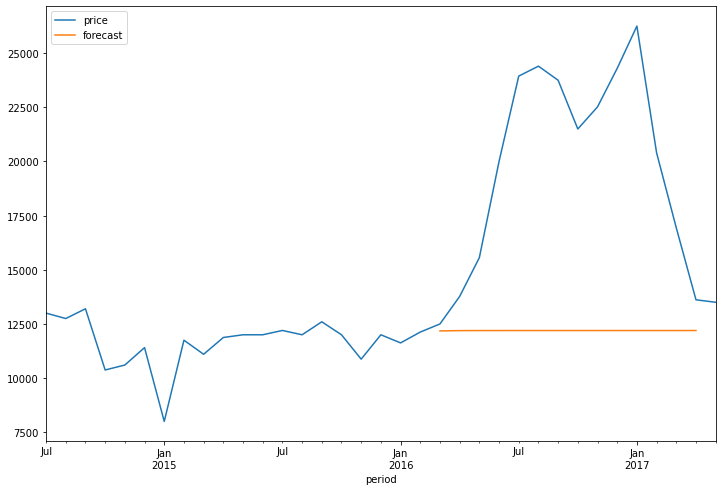

In [31]:
df_rice['forecast']=model_fit.predict(start=20,end=33,dynamic=True)
df_rice[['price','forecast']].plot(figsize=(12,8))

In [32]:
import statsmodels.api as sm

In [33]:
model=sm.tsa.statespace.SARIMAX(df_rice['price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='period'>

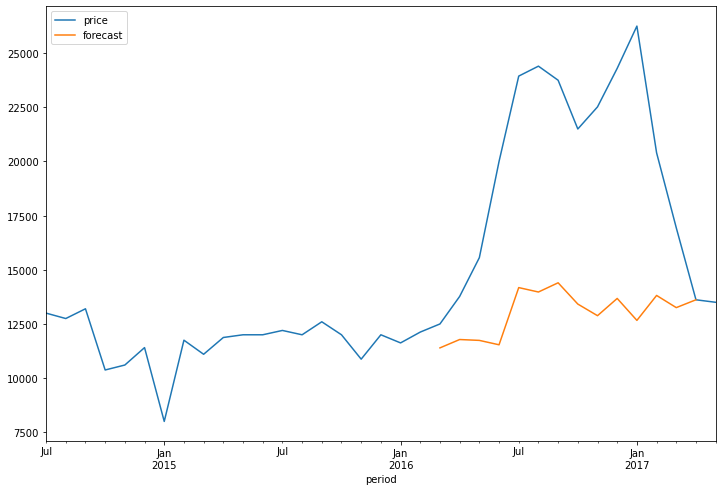

In [34]:
df_rice['forecast']=results.predict(start=20,end=33,dynamic=True)
df_rice[['price','forecast']].plot(figsize=(12,8))

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_rice.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [36]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_rice.columns)

In [37]:
future_datest_df.tail()

,price,Price First Difference,Seasonal First Difference,forecast
2021-12-01,NaN,NaN,NaN,NaN
2022-01-01,NaN,NaN,NaN,NaN
2022-02-01,NaN,NaN,NaN,NaN
2022-03-01,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN


In [38]:
future_df=pd.concat([df_rice,future_datest_df])

<AxesSubplot:>

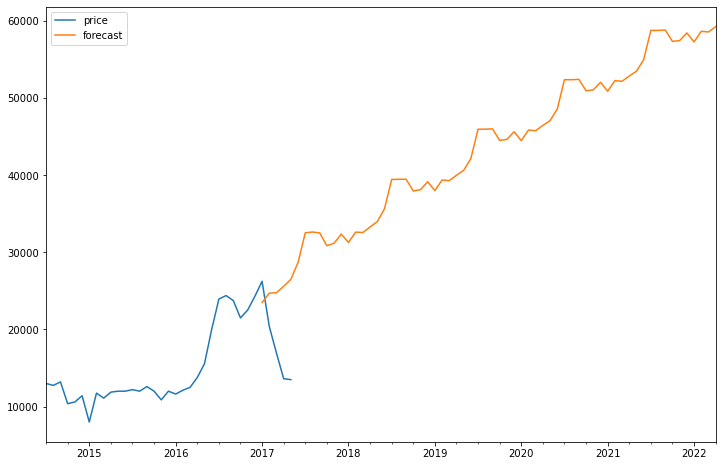

In [39]:
future_df['forecast'] = results.predict(start = 30, end = 105, dynamic= True)  
future_df[['price', 'forecast']].plot(figsize=(12, 8)) 

In [42]:
future_df.tail(60)

,price,Price First Difference,Seasonal First Difference,forecast
2017-05-01,13500.0,-115.0,-2060.0,26499.458844
2017-06-01,NaN,NaN,NaN,28701.142863
2017-07-01,NaN,NaN,NaN,32535.716643
2017-08-01,NaN,NaN,NaN,32640.322231
2017-09-01,NaN,NaN,NaN,32524.772171
2017-10-01,NaN,NaN,NaN,30860.952894
2017-11-01,NaN,NaN,NaN,31189.379922
2017-12-01,NaN,NaN,NaN,32362.143179
2018-01-01,NaN,NaN,NaN,31288.098477
2018-02-01,NaN,NaN,NaN,32626.806594
